Hypothesis - Fandango ratings are inflated even today, after this story https://fivethirtyeight.com/features/fandango-movies-ratings/ was published about it in 2015

The ratings are higly skewed to the left indicating that the ratings are very high. Let's take a look to find out if that's true

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [6]:
ratings = pd.read_csv('Movie_ratings_2016_17-master/movie_ratings_16_17.csv')

In [7]:
ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [14]:
fandango_r=pd.read_csv('Movie_ratings_2016_17-master/fandango_score_comparison.csv')

In [15]:
fandango_r.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [17]:
fandango=fandango_r[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]

In [18]:
fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [19]:
ratings=ratings[['movie','year','fandango']]

In [20]:
ratings.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Let's first check if the fandango ratings have >30 reviewers to be deemed eligible for the analysis

In [30]:
fandango['Fandango_votes'].value_counts().sort_index()

35       1
36       1
38       2
41       2
42       1
43       2
46       1
48       1
50       1
51       1
54       1
55       1
56       1
59       1
63       1
64       1
66       2
70       1
74       1
79       1
83       2
95       1
99       1
110      1
118      1
121      1
124      1
127      1
162      1
192      1
        ..
6288     1
6437     1
6506     1
6757     1
6835     1
7025     1
7123     1
7705     1
8055     1
8077     1
8096     1
8357     1
8381     1
9363     1
9418     1
9443     1
9749     1
10509    1
12055    1
12640    1
13055    1
14846    1
14998    1
15205    1
15337    1
15749    1
33538    1
34085    1
34390    1
34846    1
Name: Fandango_votes, Length: 140, dtype: int64

Yup, looks good.

In order to understand if Fandango ratings are inflaed in 2016, just like they were in 2015, we need to pick movies that were released in 2016 from the ratings dataset.

We also want to check if the number of reviewers is >30 to ensure that we have a large enough pool of ratings to deem the review eligible for analysis

In [31]:
ratings.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [38]:
fandango['year']=fandango['FILM'].str.split('(',expand=True)[1].str.strip(')')

C:\Users\pragg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
f_2015=fandango[fandango['year']=='2015']

In [53]:
f_2016=ratings[ratings['year']==2016]

In [51]:
f_2015.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [54]:
f_2016.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


Text(0.5, 0, 'Stars')

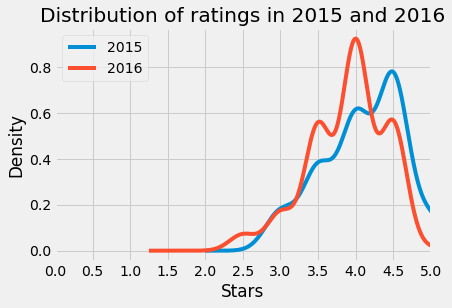

In [87]:
from numpy import arange
plt.style.use('fivethirtyeight')
f_2015['Fandango_Stars'].plot.kde(label='2015')
f_2016['fandango'].plot.kde(label='2016')
plt.legend()
plt.title('Distribution of ratings in 2015 and 2016')
plt.xticks(arange(0,5.1,0.5))
plt.xlim(0,5)
plt.xlabel('Stars')

1. Both years are heavily skewed to the left
2. 2015 is more skewed to the left than 2016
3. Both are imperfect normal distributions - 2015 is centered over 4.5 while 2016 is centered aroun 4.0
4. Ratings in 2016 seem lower than those of 2015

Understanging the frequency distribution might help us get better idea of the size of the datasets we are comparing

In [89]:
f_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [86]:
f_2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

1. In 2016, <1% of ratings were 5-stars while nearly 7% of ratings in 2016 were 5-stars
2. Although it looked like 2016 had better distributed and less inflated ratings than 2015, we still see a huge concentration of ratings around 4.0 stars


In [98]:
mean_2015 = f_2015['Fandango_Stars'].mean()
median_2015 = f_2015['Fandango_Stars'].median()
mode_2015 = f_2015['Fandango_Stars'].mode()[0]

In [99]:
mean_2016=f_2016['fandango'].mean()
median_2016=f_2016['fandango'].median()
mode_2016=f_2016['fandango'].mode()[0]

In [101]:
summary=pd.DataFrame()
summary['2015']=[mean_2015, median_2015, mode_2015]
summary['2016']=[mean_2016, median_2016, mode_2016]
summary.index=['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


([<matplotlib.axis.YTick at 0x2669468b978>,
 <a list of 11 Text yticklabel objects>)

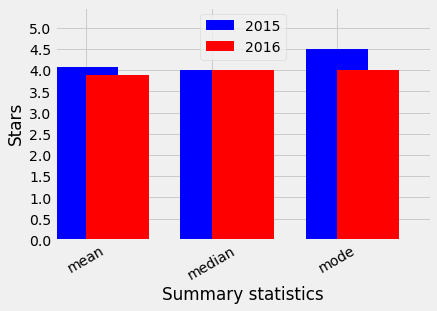

In [116]:
summary['2015'].plot.bar(legend='2015',color ='blue', align='center',rot=30)
summary['2016'].plot.bar(legend='2016', color='red',align='edge',rot=30)
plt.xlabel('Summary statistics')
plt.legend(loc='upper center')
plt.ylim(0,5.5)
plt.ylabel('Stars')
plt.yticks(arange(0,5.1,0.5))

1. Median is the same for 2015 and 2016 but mode is higher for 2015
2. Average ratings are lower in 2016